In [1]:
import pandas as pd
import os

# CHANGE THIS to your actual folder path
folder_path = "/Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/football_matches/archive"

all_data = []

for file in os.listdir(folder_path):
    print("Found file:", file)  # Debug: what files are in there?
    if file.lower().endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        print("Reading:", file_path)
        df = pd.read_csv(file_path)
        all_data.append(df)

if not all_data:
    raise ValueError("No CSV files found. Do you even go here?")

merged_df = pd.concat(all_data, ignore_index=True)

# Save it back as a merged CSV
output_path = os.path.join(folder_path, "merged_data.csv")
merged_df.to_csv(output_path, index=False)

print(f"Success! Merged CSV saved at: {output_path}")

Found file: .DS_Store
Found file: Bundesliga.csv
Reading: /Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/football_matches/archive/Bundesliga.csv
Found file: Greek Super League.csv
Reading: /Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/football_matches/archive/Greek Super League.csv
Found file: Scottish Premier League.csv
Reading: /Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/football_matches/archive/Scottish Premier League.csv
Found file: Scottish Division 1.csv
Reading: /Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/football_matches/archive/Scottish Division 1.csv
Found file: La Liga 2.csv
Reading: /Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/football_matches/archive/La Liga 2.csv
Found file: English League 1.csv
Reading: /Users/leandropinto/Library/CloudStorage/OneDrive-Pes

In [3]:
import pandas as pd

df = pd.read_csv("merged_data.csv")
print(df.columns)
print(df.head())

Index(['League', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'Result'],
      dtype='object')
       League      Date       HomeTeam        AwayTeam  HomeGoals  AwayGoals  \
0  Bundesliga  07/08/93  Bayern Munich        Freiburg        3.0        1.0   
1  Bundesliga  07/08/93       Dortmund       Karlsruhe        2.0        1.0   
2  Bundesliga  07/08/93       Duisburg      Leverkusen        2.0        2.0   
3  Bundesliga  07/08/93        FC Koln  Kaiserslautern        0.0        2.0   
4  Bundesliga  07/08/93        Hamburg        Nurnberg        5.0        2.0   

  Result  
0      H  
1      H  
2      D  
3      A  
4      H  


In [4]:
import pandas as pd

# Load the merged data
df = pd.read_csv("merged_data.csv")

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows with bad/missing dates
df = df.dropna(subset=['Date'])

# Add total goals per match
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Define season (e.g. 2022/2023)
def get_season(row):
    year = row['Year']
    month = row['Month']
    return f"{year}/{year+1}" if month >= 7 else f"{year-1}/{year}"

df['Season'] = df.apply(get_season, axis=1)

# === ANALYSIS === #

# Average goals per month
monthly_avg = df.groupby('Month')['TotalGoals'].mean().reset_index()

# Average goals per season
season_avg = df.groupby('Season')['TotalGoals'].mean().reset_index()

# Print result summaries
print("Durchschnittliche Tore pro Monat:")
print(monthly_avg)

print("\nDurchschnittliche Tore pro Saison:")
print(season_avg)

/var/folders/xt/lyg2vrcj6pd0hz071f2pjzj00000gn/T/ipykernel_8562/1324207452.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


Durchschnittliche Tore pro Monat:
    Month  TotalGoals
0       1    2.565914
1       2    2.535172
2       3    2.532948
3       4    2.632234
4       5    2.849398
5       6    2.856115
6       7    2.555842
7       8    2.612331
8       9    2.639061
9      10    2.669520
10     11    2.645435
11     12    2.638616

Durchschnittliche Tore pro Saison:
       Season  TotalGoals
0   1993/1994    2.628977
1   1994/1995    2.667108
2   1995/1996    2.640169
3   1996/1997    2.583180
4   1997/1998    2.613984
5   1998/1999    2.629640
6   1999/2000    2.653403
7   2000/2001    2.672892
8   2001/2002    2.652028
9   2002/2003    2.611256
10  2003/2004    2.609577
11  2004/2005    2.571711
12  2005/2006    2.504881
13  2006/2007    2.527529
14  2007/2008    2.596159
15  2008/2009    2.559795
16  2009/2010    2.581478
17  2010/2011    2.672133
18  2011/2012    2.696281
19  2012/2013    2.712681
20  2013/2014    2.647759
21  2014/2015    2.606095
22  2015/2016    2.617670
23  2016/2017    2.6

/var/folders/xt/lyg2vrcj6pd0hz071f2pjzj00000gn/T/ipykernel_8562/4089316697.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
/var/folders/xt/lyg2vrcj6pd0hz071f2pjzj00000gn/T/ipykernel_8562/4089316697.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


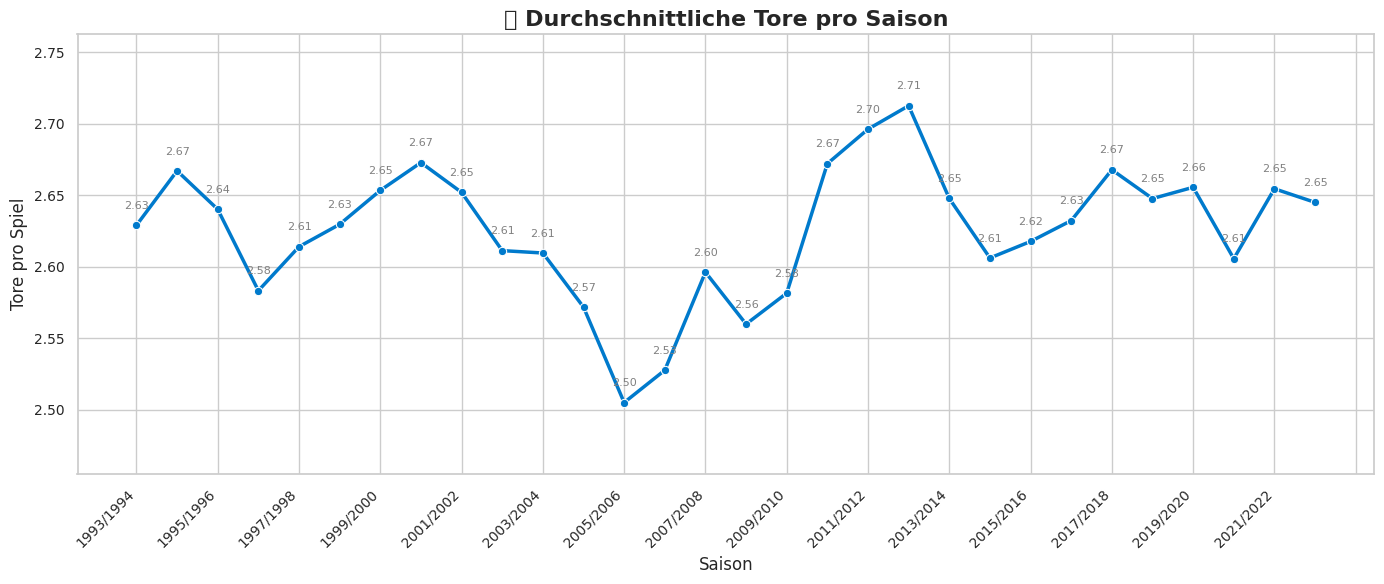

/var/folders/xt/lyg2vrcj6pd0hz071f2pjzj00000gn/T/ipykernel_8562/4089316697.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='TotalGoals', data=monthly_avg, palette='mako', ax=ax)
/var/folders/xt/lyg2vrcj6pd0hz071f2pjzj00000gn/T/ipykernel_8562/4089316697.py:72: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/leandropinto/Library/CloudStorage/OneDrive-Pessoal/School/FHGR/visual_studio_code/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


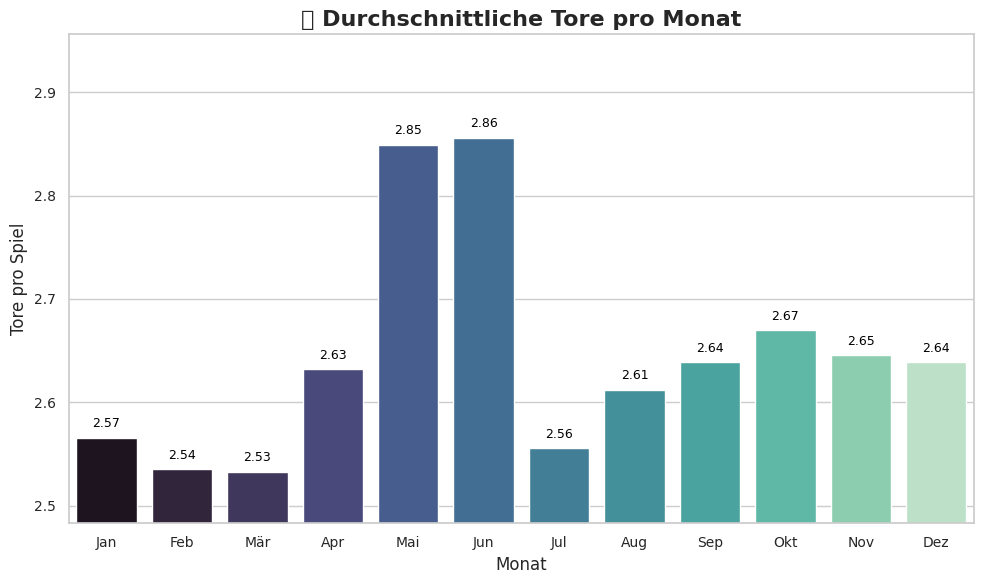

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Setup
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Load the data
df = pd.read_csv("merged_data.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

def get_season(row):
    y = row['Year']
    m = row['Month']
    return f"{y}/{y+1}" if m >= 7 else f"{y-1}/{y}"

df['Season'] = df.apply(get_season, axis=1)
season_avg = df.groupby('Season')['TotalGoals'].mean().reset_index()

# Chart
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data=season_avg, x='Season', y='TotalGoals', marker='o', linewidth=2.5, ax=ax, color='#007acc')

# Add value labels
for i, row in season_avg.iterrows():
    ax.text(i, row.TotalGoals + 0.01, f"{row.TotalGoals:.2f}", ha='center', va='bottom', fontsize=8, color='gray')

# Improve layout
ax.set_title("📊 Durchschnittliche Tore pro Saison", weight='bold')
ax.set_xlabel("Saison")
ax.set_ylabel("Tore pro Spiel")
ax.set_ylim(season_avg['TotalGoals'].min() - 0.05, season_avg['TotalGoals'].max() + 0.05)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # show every 2nd season to avoid clutter
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Monthly goal averages
monthly_avg = df.groupby('Month')['TotalGoals'].mean().reset_index()

# Fancy month labels
month_labels = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

# Create the monthly plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Month', y='TotalGoals', data=monthly_avg, palette='mako', ax=ax)

# Add value labels on top of bars
for index, row in monthly_avg.iterrows():
    ax.text(index, row.TotalGoals + 0.01, f"{row.TotalGoals:.2f}", ha='center', fontsize=9, color='black')

# Fancy stuff
ax.set_title("🌤️ Durchschnittliche Tore pro Monat", weight='bold')
ax.set_xlabel("Monat")
ax.set_ylabel("Tore pro Spiel")
ax.set_xticks(range(12))
ax.set_xticklabels(month_labels)
ax.set_ylim(monthly_avg['TotalGoals'].min() - 0.05, monthly_avg['TotalGoals'].max() + 0.1)
plt.tight_layout()
plt.show()